# Python Programming - Pair Assignment

### This is your assignment notebook.

In this notebook you and your partner will write your pair assignment. Steps for submitting the assignment will be described on Learn.

### How to edit a notebook that has more than code: 

In this notebook you can see there are:

- **code cells** - in these you can edit and run python code
- **markdown cells** - basically text cells, like the one you are reading now. When you are done editing them, 'Run' them as you would run your python code to make them pretty. They use the 'Markdown' text formatting language, so eg. starting a line with # or ## will make it a header, and surroounding something with two asterixes ** will make it bold

Double-click this cell to see how you can edit a markdown cell and then Run it with Shift+Enter to see it 'interpreted' into headers and styled text. 

- To change a type of cell, use dropdown in the menu on top.
- remember to save your work frequently with usual keyboard shortcut, or File > Save & Checkpoint

small notes:

- please do not rename the notebook file.
- use **+** plus icon in the menu to add new cells



# Your Week 3 assignment task: 

### Formulate and answer a business question using a dataset and methods you've seen in the notebooks so far.

Pick one of the datasets we have used in the notebooks you have seen so far. In the notebooks you have looked at the datasets and were guided through one or two simple tasks for each. Look at the data - what type of questions can they answer?

The question does not need to be complicated. Your task is to use python to operate on data, find answer and support it with a graph or well-crafted table.


### Deliverable:

In your notebook please include all the code that you used to arrive at the conclusion. Also 

At the end of your notebook, you should provide:

- a markdown (text) cell with your mini-report (200 words +/- 10%). For reference, 'Marking criteria' section below has around 220 words)
- a cell which will generate the graph or table that accompanies your mini-report (you are allowed to combine number of graphs, if they are combined into one unit and make sense, eg. combining 3 bar charts side by side, or overlapping a line chart with a bar chart).




### Marks:

You will get points in university marking system for each of the below categories. 

0- 50% : Unsafisfactory

50-60% : Good

60-70% : Very Good

70% +  : Excellent
 
Your grade will be the average of your points in all categories. This assignment is worth 10% of your grade for this course. You and your partner will get the same grade. Only one of you should submit the assignment.

### Marking Criteria:

**A) Business Question and Answer:** Did you manage to find a question that can be answered with given data? As an analyst you will often have to dive into available data and identify how it ccan help the business, or solve a problem, withou first knowing what the problem is. Also can you formulate a clear answer to the question you created?

**B) Using the Data:** How well did you use the data to answer your question? Your answer should be supported by what you found in the data. Briefly describe why this was the correct data, and correct analysis to perform on it.

**C) Visualisation:** Can you aid your argument/aswer with visual clues? Graph can say a thousand words, but it is also easy to make one which is confusing, or misleading. Use simple (or highly customised) graphs to make your argument clearer.

**D) Code Quality:** Is your code clean, readable and DRY (Don't repeat yourself)? Are you using good readable variable names? Did you clean up your code and does it not include enay old/unused parts?

**E) Code Structure:** Is your code well structured and broken down? Just like good writing has sentences, paragraphs and chapters, good code should be split into sections. Breakdown your code into cells and functions. Use meaningful signposts (eg. comments, function names) to guide the reader through your code.


### Difficulty:

This assignment should not take you and your partner more than 1-2h. You can take one of the notebooks you liked working on and extract from it only the sections that helped you to address the question you decided on. There are not extra points for making the question DIFFICULT, but you are graded for CLEAN CODE and COMMUNICATING clearly.

# Some notes on how to edit a 'markdown' cell.

Change what type of a cell with a dropdown next to the run button

this is an example of 'Markdown' cell. You can use **all sorts** of styling in Markdown language. https://www.markdownguide.org/basic-syntax/

To edit cell, double-click it. To see how the result will look 'Run' this cell.

eg:

# header is created by adding # before the line

* bullet
* points

line:

---

`code sample`

# Your submission goes below:

UUN - S2286666, S2336006

### Code

In [1]:
#Installing the necessary libraries 
!pip install seaborn
!pip install adjustText

In [2]:
#Importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from adjustText import adjust_text
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the dataset from the data provided in the data module.
raw_data = pd.read_csv('edinburgh_airbnb_listings.csv')

In [4]:
#cleaning the dataset

#Removing the outliers by selecting the listings which has the price within z-score < 3
first_cleaning = raw_data[(np.abs(stats.zscore(raw_data['price']))<3)]
#Removing the listings which has price=0
cleaned_data = first_cleaning[first_cleaning['price']!=0]

In [5]:
#Creating price summary tables for different room type and all room type listings

room_type_level_summary=cleaned_data[['room_type','price']].groupby('room_type').describe()
room_type_level_summary.columns = ['_'.join(col) for col in room_type_level_summary.columns.values]

overall_summary=cleaned_data[['room_type','price']].describe()


#Manipulating the overall_summary dataframe and merging with room_type_level_summary dataframe
overall_summary=overall_summary.transpose().add_prefix('price_')
overall_summary.index=['All room types']
merged_table=pd.concat([room_type_level_summary,overall_summary])

#Manipulating the merged_table dataframe and renaming the column names as per the reporting requirement
merged_table['room_type']= merged_table.index
summary_table=merged_table[['room_type','price_count','price_min','price_max','price_mean','price_50%','price_std' ]].round(decimals=1)
summary_table=summary_table.rename(columns={'room_type':'Room Types','price_count':'No. of Listings','price_min':'Minimum Price','price_max':'Maximum Price','price_mean': 'Mean Price','price_50%':'Median Price','price_std':'Standard Deviation of Price' })


In [6]:
#Subsetting the dataset to create neighbourhood_level_summary and neighbourhood_level_room_type_summary dataframes
neighbourhood_level_data = cleaned_data[['id','neighbourhood','room_type','latitude','longitude','price']]
neighbourhood_level_summary=neighbourhood_level_data.groupby(['neighbourhood']).agg(no_of_listings=pd.NamedAgg('id','count'),price=pd.NamedAgg('price','median'),latitude=pd.NamedAgg('latitude','median'),longitude=pd.NamedAgg('longitude','median'))
neighbourhood_level_room_type_summary=neighbourhood_level_data.groupby(['neighbourhood','room_type']).agg(no_of_listings=pd.NamedAgg('id','count'),price=pd.NamedAgg('price','median'),latitude=pd.NamedAgg('latitude','median'),longitude=pd.NamedAgg('longitude','median')).reset_index()

#Intializing an empty dictionary and creating dataframes to annotate the highest price and highest listings in bubble plot
dataframe_variables={}
annotate_top_10_room_type_prices=pd.DataFrame()
for room_type in cleaned_data['room_type'].unique():
    dataframe_variables['top_10_{}'.format(room_type)]=neighbourhood_level_room_type_summary[neighbourhood_level_room_type_summary['room_type']==room_type].sort_values(by='price',ascending=False).head(10)
    annotate_top_10_room_type_prices=pd.concat([annotate_top_10_room_type_prices,dataframe_variables['top_10_{}'.format(room_type)]])
annotate_top_10_room_type_prices=annotate_top_10_room_type_prices.reset_index()

In [7]:
#Initializing all the Functions

#Function to plot graph
def plot_graph(df,x_label,y_label,hue_colour,size_value,size_points,alpha_value,lengend_value):
    plotting_boundries = (df['longitude'].min(), df['longitude'].max(),df['latitude'].min(), df['latitude'].max())
    fig, ax = plt.subplots(figsize = (20,15))
    backgroud_image = plt.imread('Edinburgh.png')
    sns.scatterplot(data = df, x = x_label, y = y_label, hue = hue_colour,size=size_value,sizes= size_points,alpha=alpha_value,legend = lengend_value)
    
    ax.set_xlim(plotting_boundries[0],plotting_boundries[1])
    ax.set_ylim(plotting_boundries[2],plotting_boundries[3])
    ax.imshow(backgroud_image, zorder=0, extent = plotting_boundries, aspect= 'equal')
    if size_value == 'no_of_listings':
        ax.set_title('Figure 3: Distribution of various Airbnb listings across Neighbourhoods')
        show_annotate_no_of_listings()
        
    else:
        ax.set_title('Figure 4: Airbnb Room Type Median prices across Neighbourhoods')
        show_annotate_price()

#Function to Annotate first few highest values based on different room types        
def show_annotate_no_of_listings():
    texts = [plt.text(annotate_top_10_room_type_prices.longitude[points], annotate_top_10_room_type_prices.latitude[points],annotate_top_10_room_type_prices.no_of_listings[points], horizontalalignment='left', size='medium', color='black', weight='semibold') for points in range(0,annotate_top_10_room_type_prices.shape[0])]
    adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red'))
    plt.show()
    
def show_annotate_price():
    texts = [plt.text(annotate_top_10_room_type_prices.longitude[points], annotate_top_10_room_type_prices.latitude[points],annotate_top_10_room_type_prices.price[points], horizontalalignment='left', size='medium', color='black', weight='semibold') for points in range(0,annotate_top_10_room_type_prices.shape[0])]
    adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red'))
    plt.show()
    

### Data Visualization

In [8]:
#Table to determine Price statistics for the given listings
styles=[dict(selector="caption", props=[("font-size", "120%"),("font-weight", "bold")])]
price_statistics_table=summary_table.style.set_precision(2).background_gradient(cmap='GnBu',axis=0).hide_index()
price_statistics_table=price_statistics_table.set_caption('Table 1: Price Statistics for Airbnb Edinburgh Listings').set_table_styles(styles)
price_statistics_table

Room Types,No. of Listings,Minimum Price,Maximum Price,Mean Price,Median Price,Standard Deviation of Price
Entire home/apt,8253.00,10.00,1250.00,138.30,95.00,148.60
Private room,4876.00,8.00,1000.00,55.10,45.00,55.50
Shared room,71.00,10.00,1000.00,216.20,50.00,264.80
All room types,13200.00,8.00,1250.00,108.00,75.00,130.30


Text(0.5, 1.0, 'Figure 1: Box plot of Airbnb prices for different room types')

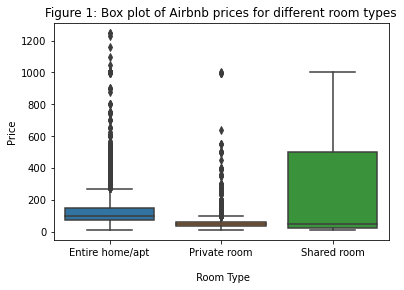

In [9]:
#Boxplot to understand the price distribution and variance 
price_boxplot=sns.boxplot(x=cleaned_data['room_type'], y = cleaned_data['price'])
plt.xlabel('\n Room Type') 
plt.ylabel('Price')
plt.title('Figure 1: Box plot of Airbnb prices for different room types')

Text(0.5, 1.0, 'Figure 2: Frequencies of Prices for Different Room Types')

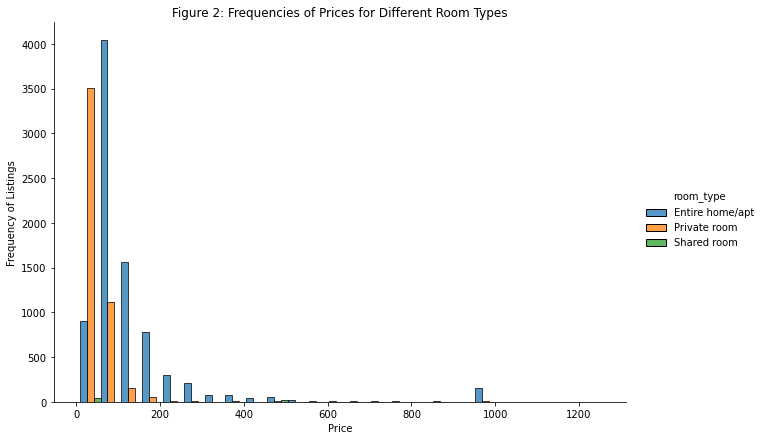

In [10]:
#Histogram to determine the frequencies of price range for the different types of rooms
sns.displot(data=cleaned_data, x='price',
            kind='hist',
            height=6, aspect=1.5, bins=25,
            hue='room_type', multiple='dodge')
plt.ylabel('Frequency of Listings')
plt.xlabel('Price')
plt.title('Figure 2: Frequencies of Prices for Different Room Types')

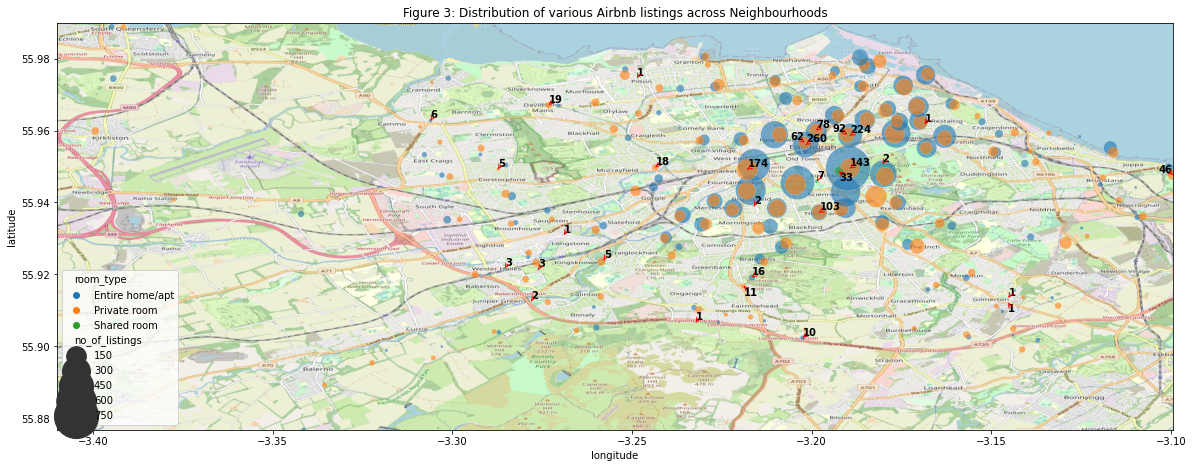

Note: For plotting neighbourhood co-ordinates, we considered the median of co-ordinates of listings in the neighbourhood


In [11]:
#Bubble plot to visualise the no. of listings (room type wise) present in neighbourhoods across the city
plot_graph(neighbourhood_level_room_type_summary,'longitude','latitude',neighbourhood_level_room_type_summary['room_type'],'no_of_listings',(0, 2000),0.6,'brief')
print('Note: For plotting neighbourhood co-ordinates, we considered the median of co-ordinates of listings in the neighbourhood.')

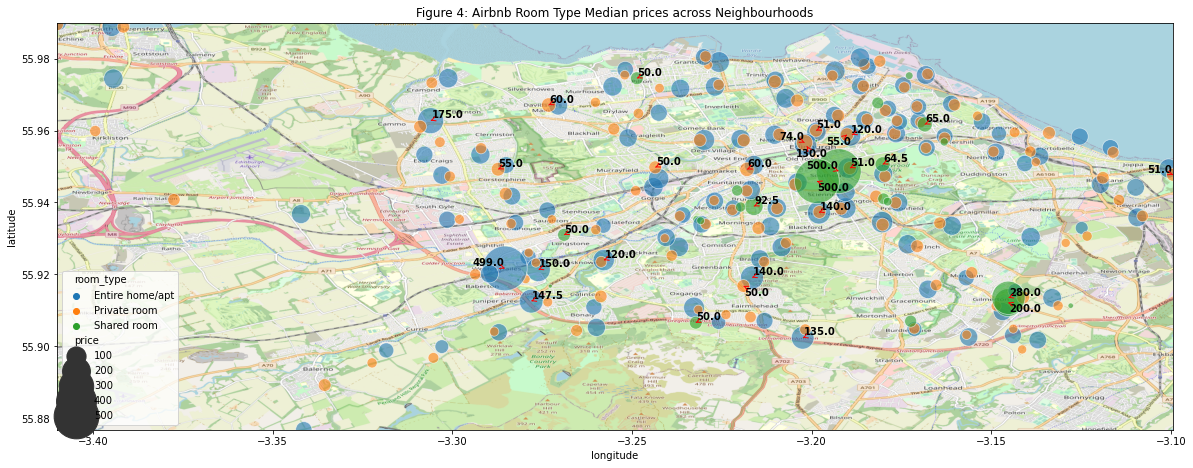

Note: For plotting neighbourhood co-ordinates, we considered the median of co-ordinates of listings in the neighbourhood


In [12]:
#Bubble plot to visualise the median prices for all neighbourhoods
plot_graph(neighbourhood_level_room_type_summary,'longitude','latitude',neighbourhood_level_room_type_summary['room_type'],'price',(0, 2000),0.6,'brief')
print('Note: For plotting neighbourhood co-ordinates, we considered the median of co-ordinates of listings in the neighbourhood.')

### Report


**Problem Statement**:
The Airbnb Edinburgh team wants to understand the distribution of listings across the city, and the listings' price patterns.

**Challenges**: 
1. Outliers in the data
2. Inaccuracies in the prices
3. Understanding the patterns in the data and figuring out the best way to visualise the data 

**Solution**:
We observed three different room types among the Airbnb listings. The 'Entire home/apt' room type is most prevalent, comprising approx. 62.5% of overall listings and has relatively higher prices. In addition, the 'Shared room'  type has the highest price variability, which might be driven by the small sample size (approx. 0.54% of overall listings). Most listings are concentrated near the city centre.

A considerable number of the 'Private room' type properties are priced in the range of 0 to 50, and 'Entire home/apt' type properties are between 50 and 100.

On average, 'Shared room' listings close to the city centre has the opportunity to generate even higher revenue compared to the 'Entire home/apt' listings. Table 1 and Figure 4 support this inference, as the maximum price of the 'Entire home/apt' type listings is comparable to that of 'Shared Room' listings close to the city centre.